# 12 Day Program: Day 4
Analyzing the Value of Energy Cost Saving Program for businesses in New York City 

## Importing the required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## Uploading the data

In [2]:
vecsp_data = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

## Question 1: How many different companies are represented in the data set?

In [3]:
# Checking information about given data.
vecsp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

In [4]:
# Checking the unqiue values of the company names.
vecsp_data['Company Name'].unique()

array(['1 State Street', '100 Church LLC', '100 Wall Investments',
       '1-10 Bush Terminal Owner LP',
       '120 Broadway Acquisitions JV, LLC (Ldmk)', '120 Wall Street, LLC',
       '139 ACA Realty, Inc.',
       '141 Lake Avenue Realty c/o JR Produce, Inc.',
       '14-10 123rd Street LLC', '183 Lorriane Street LLC',
       '195 Broadway, LLC', '2 Rector Street (NY) LLC',
       '21st Century Optics, Inc.', '25 Broadway (Ldmk)', '4Over4.com',
       '538-540 West 35 Corp', '55 Water, LLC', '72andSunny Partners LLC',
       '75 Broad Street', 'A & L Scientific Corp.',
       'A.K.S. International, Inc', 'ABEL CINE TECH, INC.',
       'ABIGAL PRESS, INC.', 'Accenture LLP',
       'Achieve Beyond, Inc. (Formerly Bilinguals, Inc.)',
       'Action Carting Environmental Services, Inc', 'ADP Oak Point LLC',
       'AECOM Technical Services Inc', 'Aesthetonics, Inc.',
       'AFC INDUSTRIES, INC.', 'African Services Committee, Inc.',
       'Aids Vaccine Advocacy Coalition',
       'ALA

In [5]:
# Some names are written in all caps, some are not, checking that case doesn't matter when counting the unique values.
vecsp_data['Company Name'].apply(lambda x: x.lower()).nunique() == vecsp_data['Company Name'].nunique()

True

In [6]:
# Counting unique values of the company names and printing out the answer.
print('There are %s different companies represented in the data set.' % vecsp_data['Company Name'].nunique())

There are 439 different companies represented in the data set.


## Question 2: What is the total number of jobs created for businesses in Queens?

In [7]:
# Checking for Queens in the data to verify that it is uniquely spelled.
vecsp_data['Borough'].unique()

array(['Brooklyn', 'New York', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [8]:
# Checking out the data.
vecsp_data[vecsp_data['Borough']=='Queens']['Job created']

6       NaN
8       NaN
12      NaN
14      NaN
15      NaN
       ... 
433    20.0
435     NaN
436     NaN
439     NaN
449     NaN
Name: Job created, Length: 173, dtype: float64

In [9]:
# A lot of them are NaN, will drop them for this exercise and print the answer.
jobs_created = sum(vecsp_data[vecsp_data['Borough']=='Queens']['Job created'].dropna())
print('The total number of jobs created for business in Queens is %s.' % int(jobs_created))

The total number of jobs created for business in Queens is 102.


## Question 3: How many different unique email domains names are there in the data set?

In [10]:
# First, let's take a look at the email column.
vecsp_data['company email'].dropna()

0         eskoblo@energyspec.com
3      akimball@industrycity.com
4          clettich@silvprop.com
5          jmccalla@silvprop.com
6              barbara@dial7.com
                 ...            
445     donaldlau@wontonfood.com
446         brawnworks@gmail.com
447             sheidya@wwps.com
448       keren@wudfurniture.com
449         bill.popp@wurtec.com
Name: company email, Length: 433, dtype: object

In [11]:
# Naturally, we would split the email address by @ to find the domain, but doing that leads to an error indicating that some entries are missing @ symbol. To check them out, we will create a new column that shows only the entries without @. It looks like these entries are pure domains. Hence, I'm going to count them towards the number of unique domains.
vecsp_data['missing @'] = vecsp_data['company email'].dropna().apply(lambda el: None if '@' in el else el)
vecsp_data['missing @'].dropna()

75         billieannplastics.com
87     jgewitrtzbrooklynnets.com
188         officegreenfelds.com
307    adenovarebiologistics.com
419      urbangreenfurniture.com
Name: missing @, dtype: object

In [12]:
# Now let's create a new column that will contain the email domains. Splitting by @ if it is present in the address, otherwise just keeping the line as is since we confirmed that these are domains.
vecsp_data['email domains'] = vecsp_data['company email'].dropna().apply(lambda el: el.split('@')[1].lower() if '@' in el else el)

In [13]:
# Printing the asnwer
print('There are %s different email domains represented in the data set.' %vecsp_data['email domains'].dropna().nunique())

There are 361 different email domains represented in the data set.


## Question 4: Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [14]:
# Chekcing unique NTAs.
print(vecsp_data['NTA'].unique(),vecsp_data['NTA'].nunique())

['Midwood' 'SoHo-TriBeCa-Civic Center-Little Italy'
 'Battery Park City-Lower Manhattan' 'Sunset Park West'
 'Hunters Point-Sunnyside-West Maspeth'
 "Mariner's Harbor-Arlington-Port Ivory-Graniteville" 'College Point'
 'Carroll Gardens-Columbia Street-Red Hook' 'Steinway'
 'DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill' 'Glendale'
 'Ozone Park' 'Forest Hills' nan 'Hunts Point' 'Bushwick South'
 'Whitestone' 'Manhattanville' 'Van Nest-Morris Park-Westchester Square'
 'Crown Heights North' 'North Side-South Side'
 'Queensbridge-Ravenswood-Long Island City' 'Jamaica'
 'Springfield Gardens South-Brookville' 'Murray Hill-Kips Bay'
 'Mott Haven-Port Morris' 'Maspeth' 'park-cemetery-etc-Brooklyn'
 'Windsor Terrace' 'Seagate-Coney Island' 'Greenpoint' 'East Williamsburg'
 'East New York (Pennsylvania Ave)' 'Richmond Hill' 'Borough Park'
 'Brooklyn Heights-Cobble Hill'
 'Soundview-Castle Hill-Clason Point-Harding Park' 'Park Slope-Gowanus'
 'Old Astoria' 'Brownsville' 'East New York' 'Flushi

In [15]:
# Let's create a new DataFrame groupped by NTA and count the items.
by_NTA = vecsp_data.groupby('NTA').agg(listed_businesses=('Company Name', 'count'), total_savings=('Total Savings', 'sum'), total_jobs = ('Job created', 'sum'))
by_NTA.head()

,listed_businesses,total_savings,total_jobs
NTA,,,
Astoria,3,34229.96,0.0
Baisley Park,1,21522.74,0.0
Battery Park City-Lower Manhattan,9,4229017.17,0.0
Bedford,3,186340.03,0.0
Bensonhurst West,1,-379.47,0.0


In [16]:
# Adding a column for average total savings
by_NTA['average_total_savings']=by_NTA['total_savings']/by_NTA['listed_businesses']
by_NTA.head()

,listed_businesses,total_savings,total_jobs,average_total_savings
NTA,,,,
Astoria,3,34229.96,0.0,11409.986667
Baisley Park,1,21522.74,0.0,21522.740000
Battery Park City-Lower Manhattan,9,4229017.17,0.0,469890.796667
Bedford,3,186340.03,0.0,62113.343333
Bensonhurst West,1,-379.47,0.0,-379.470000


In [17]:
# Taking the data that only has 5 or more businesses listed.
NTA_stats = by_NTA[by_NTA['listed_businesses']>=5]
NTA_stats.head(20)

,listed_businesses,total_savings,total_jobs,average_total_savings
NTA,,,,
Battery Park City-Lower Manhattan,9,4229017.17,0.0,469890.796667
Bushwick South,10,261404.55,10.0,26140.455000
Carroll Gardens-Columbia Street-Red Hook,11,267711.29,0.0,24337.390000
College Point,7,120115.61,2.0,17159.372857
Crown Heights North,9,36326.69,0.0,4036.298889
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,10,599503.40,0.0,59950.340000
East New York,9,435897.84,15.0,48433.093333
East Williamsburg,11,153896.89,0.0,13990.626364
Greenpoint,14,136551.09,0.0,9753.649286


## Question 5: Save your result for the previous question as a CSV file.

In [18]:
NTA_stats.to_csv('NTA_AverageSavings_TotalJobs.csv')

# 12 Day Program: Day 5
Visualizing the data on the Value of Energy Cost Saving Program for businesses in New York City

## Question 1: make a scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

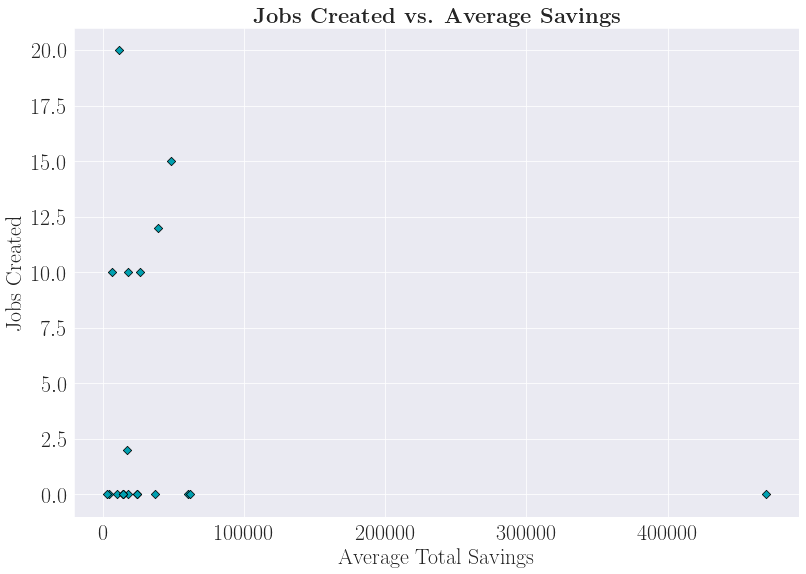

In [19]:
# I'm assuming here that the question is asked about the data set grouped by NTA with 5 or more businesses listed.
fig = plt.figure(figsize = (13,9))
fs = 22
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
sns.scatterplot(data = NTA_stats, x = 'average_total_savings', y = 'total_jobs', s = 35, edgecolor = 'k', color = '#00a0b0', marker = 'D')
plt.xlabel(r'Average Total Savings', fontsize = fs)
plt.ylabel(r'Jobs Created', fontsize = fs)
plt.title(r'Jobs Created vs. Average Savings', fontsize = fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs);

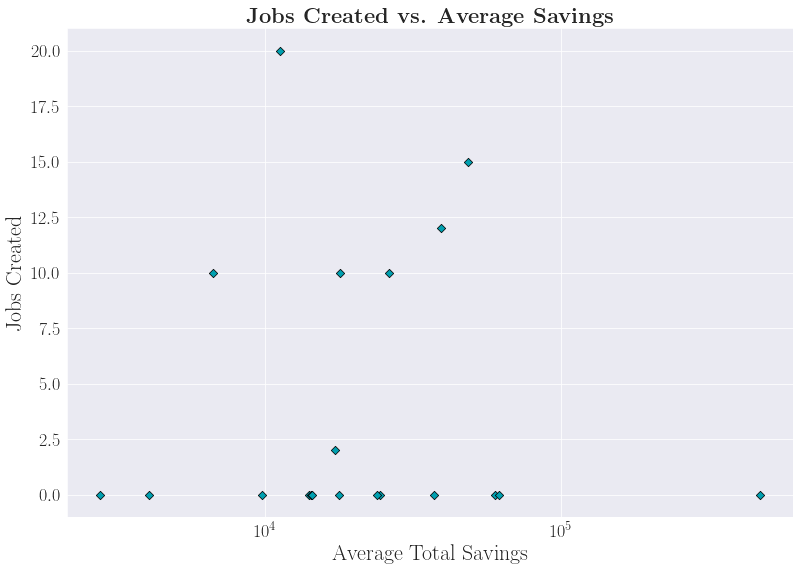

In [20]:
fig = plt.figure(figsize = (13,9))
sns.scatterplot(data = NTA_stats, x = 'average_total_savings', y = 'total_jobs', s = 35, edgecolor = 'k', color = '#00a0b0', marker = 'D')
plt.xscale('log')
plt.xlabel(r'Average Total Savings', fontsize = 22)
plt.ylabel(r'Jobs Created', fontsize = 22)
plt.title(r'Jobs Created vs. Average Savings', fontsize = 22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

## Question 2: create a histogram of the log of the average total savings.

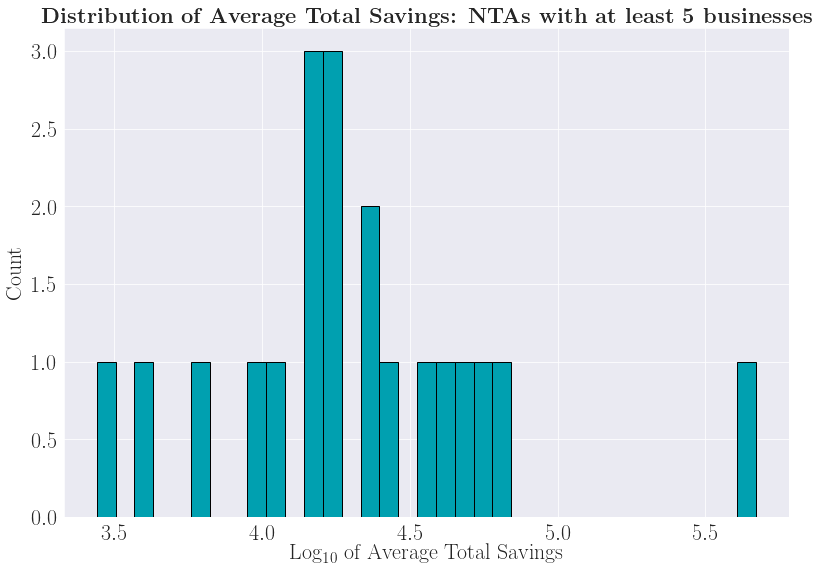

In [23]:
# For the data set grouped by NTA with 5 or more businesses.
fig = plt.figure(figsize = (13,9))
NTA_stats['average_total_savings'].apply(lambda x: np.log10(x) if np.isfinite(np.log10(x)) else np.nan).dropna().hist(bins = 35, edgecolor = 'k', color = '#00a0b0')
plt.title(r'Distribution of Average Total Savings: NTAs with at least 5 businesses', fontsize = fs)
plt.xlabel(r'Log$_{10}$ of Average Total Savings', fontsize = fs)
plt.ylabel(r'Count', fontsize = fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs);

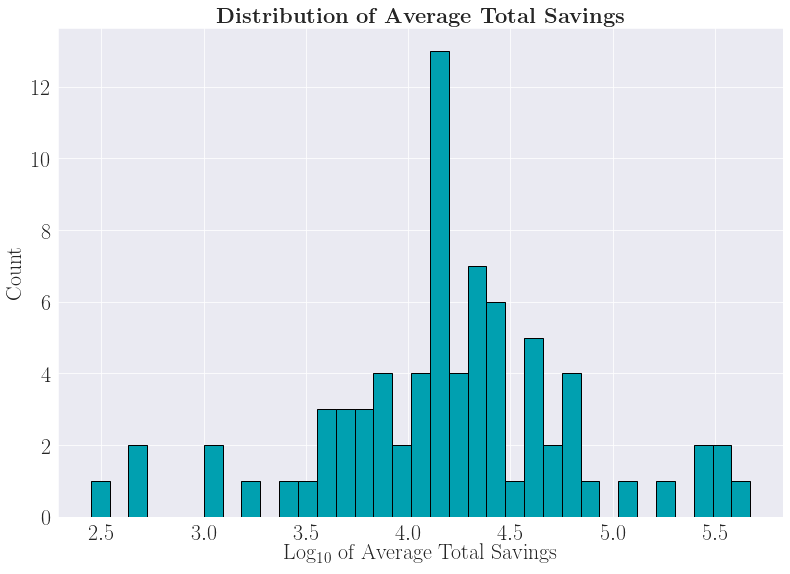

In [24]:
# For the data set grouped by NTA with all businesses included.
fig = plt.figure(figsize = (13,9))
by_NTA['average_total_savings'].apply(lambda x: np.log10(x) if np.isfinite(np.log10(x)) else np.nan).dropna().hist(bins = 35, edgecolor = 'k', color = '#00a0b0')
plt.title(r'Distribution of Average Total Savings', fontsize = fs)
plt.xlabel(r'Log$_{10}$ of Average Total Savings', fontsize = fs)
plt.ylabel(r'Count', fontsize = fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs);

## Question 3: create a line plot of the total jobs created for each month.

In [25]:
# Let's consider the original data. First we will convert the date column into datetime format.
vecsp_data['Effective Date'] = pd.to_datetime(vecsp_data['Effective Date'])

In [26]:
# Extracting month from the timestamp.
vecsp_data['Effective Month Name'] = vecsp_data['Effective Date'].dt.month_name()
vecsp_data['Effective Month'] = vecsp_data['Effective Date'].dt.month

In [27]:
# Taking the columns Job Created and respective month. Since there are so many missing data points for the jobs, dropping NA, grouping by month and summing the jobs for each month.
jobs_by_month = vecsp_data[['Job created','Effective Month','Effective Month Name']].dropna().groupby('Effective Month Name').agg(Job_created=('Job created', 'sum'),Effective_Month=('Effective Month', 'max')).reset_index()

In [28]:
# Checking the new data frame.
jobs_by_month.head(10)

,Effective Month Name,Job_created,Effective_Month
0,April,2.0,4
1,December,10.0,12
2,February,27.0,2
3,July,20.0,7
4,June,63.0,6
5,March,20.0,3
6,May,2.0,5
7,November,5.0,11


In [29]:
# Now we can sort by month
jobs_by_month.sort_values(by = ['Effective_Month'], inplace=True)

AttributeError: 'Line2D' object has no property 'errorbar'

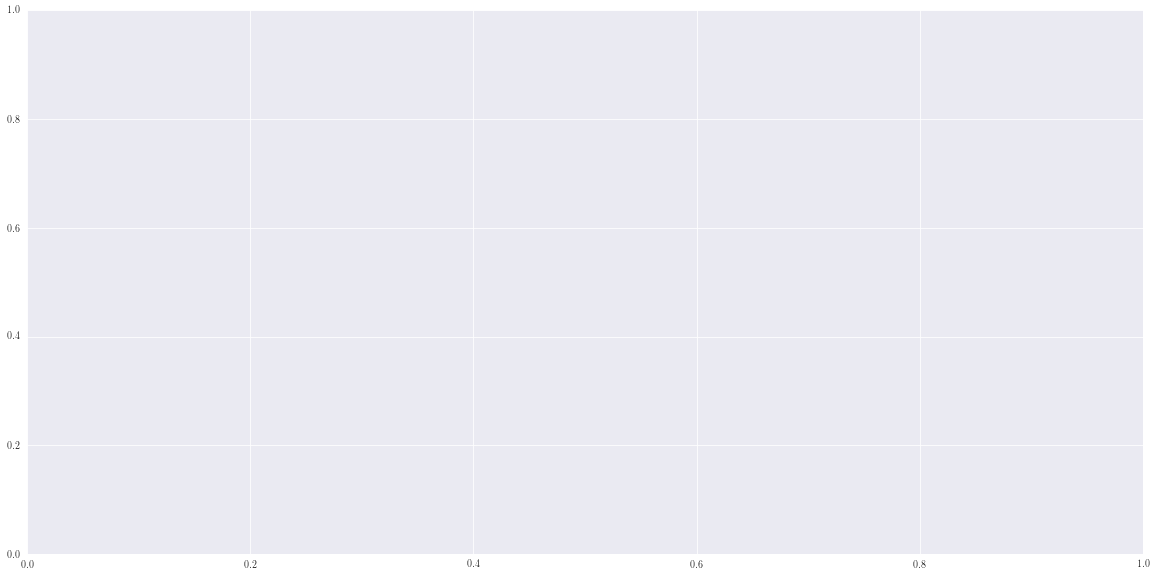

In [36]:
fig = plt.figure(figsize = (20,10))
sns.lineplot(data = jobs_by_month, x = 'Effective Month Name', y = 'Job_created', linewidth = 3, marker = 'D',
             markersize = 10, mec = 'k', mfc = '#00a0b0', ls = '--', color = '#00a0b0',errorbar = None)
plt.xlabel('Effective Month', fontsize = fs)
plt.ylabel('Number of Jobs Created', fontsize = fs)
plt.title(r'Number of Jobs Created vs. Effective Month', fontsize = fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylim(0, 70);

In [32]:
# If we only want to include the data for the NTAs with over 5 businesses listed, first, retrieve these NTAs.
NTAs_over_5_listings = NTA_stats.reset_index()['NTA'].values
NTAs_over_5_listings

array(['Battery Park City-Lower Manhattan', 'Bushwick South',
       'Carroll Gardens-Columbia Street-Red Hook', 'College Point',
       'Crown Heights North',
       'DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill',
       'East New York', 'East Williamsburg', 'Greenpoint',
       'Hunters Point-Sunnyside-West Maspeth', 'Hunts Point',
       'Manhattanville', 'Maspeth', 'Mott Haven-Port Morris',
       'Queensbridge-Ravenswood-Long Island City',
       'SoHo-TriBeCa-Civic Center-Little Italy',
       'Springfield Gardens South-Brookville', 'Steinway',
       'Sunset Park West', 'park-cemetery-etc-Brooklyn'], dtype=object)

In [33]:
# Filter the overall data by these NTAs, and repeat the procedure from before: grab the necessary columns and group by month.
jobs_by_month_over_5_listings = vecsp_data[vecsp_data['NTA'].isin(NTAs_over_5_listings)][['Job created','Effective Month','Effective Month Name']].dropna().groupby('Effective Month Name').agg(Job_created=('Job created', 'sum'),Effective_Month=('Effective Month', 'max')).reset_index()

In [34]:
# Sorting by month.
jobs_by_month_over_5_listings.sort_values(by = ['Effective_Month'], inplace=True)

AttributeError: 'Line2D' object has no property 'errorbar'

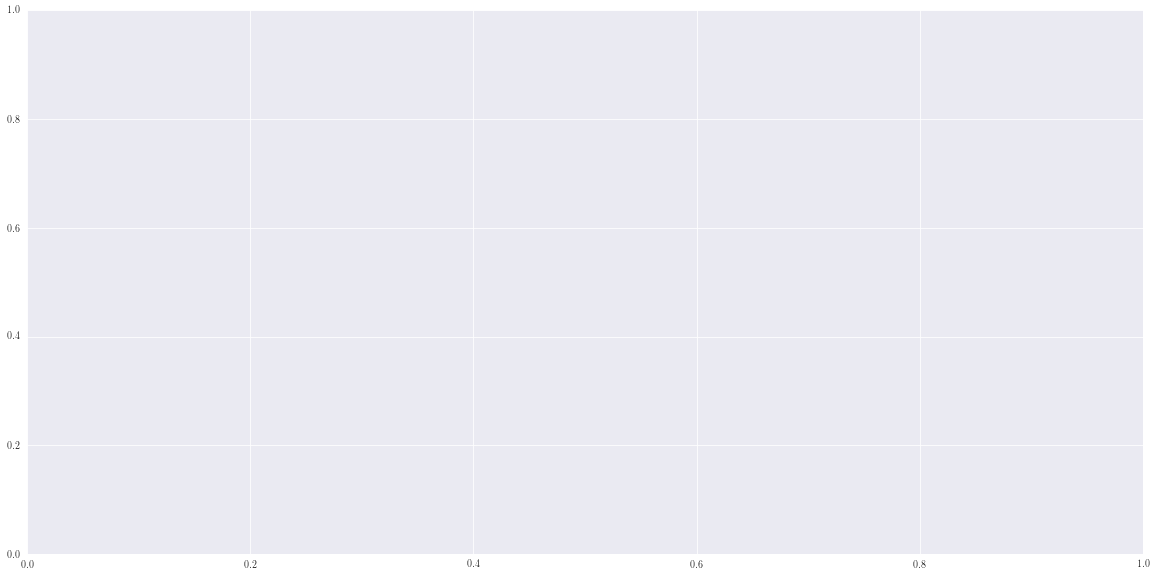

In [35]:
fig = plt.figure(figsize = (20,10))
sns.lineplot(data = jobs_by_month_over_5_listings, x = 'Effective Month Name', y = 'Job_created', linewidth = 3, errorbar = None, marker = 'D',
             markersize = 10, mec = 'k', mfc = '#00a0b0', ls = '--', color = '#00a0b0')
plt.xlabel('Effective Month', fontsize = fs)
plt.ylabel('Number of Jobs Created', fontsize = fs)
plt.title(r'Number of Jobs Created vs. Effective Month for NTAs with over 5 listed businesses', fontsize = fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylim(0, 70);